##Aula 1
Pré-requisitos
Conta ativa no GEE, como criar: https://earthengine.google.com/new_signup/

### Carregando as bibliotecas necessárias no python

O curso será todo baseado na biblioteca geemap, que contém diversas ferramentas para utilização do gee no python.
Maiores informações:
https://geemap.org/ 

In [ ]:
%%capture 
# O comando capture é utilizado para que os outputs da célula não sejam exibidos, se quiser exibir, é só comentar a linha
!pip install geemap # pip é o comando de instalação no python, quando vc coloca a ! na frente do comando, vc está executando como se fosse no prompt de comando

In [ ]:
# import geemap #aqui vc está importando a biblioteca
import ee

In [ ]:
import geemap

In [ ]:
Map = geemap.Map() #esse comando vai exigir uma autenticação


To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=pCHbKkVur-Ammcl1rnGBmAKzLBcrjWToJuk1J-exOUo&tc=HqK3blEg13gTk2Bk89uLncbryTin-Kfv1kHucNdYsZw&cc=HdCBUYiA-YL9KIGzGr0sI5tiGYQn919-HMLtgZ4LTu4

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AdQt8qgD6hfw3sDs4ir9IEvhB_cCXUrrL6x-RKuIoY7_hoXMU4WsUDUVc_Q

Successfully saved authorization token.


### Área de estudo 
*Abreviações comuns: AOI ou ROI*

Seleção de AE de estudo	

Exemplos de criação de um polígono para a AE de estudo

**Opção 1**
*   Desenhar a AE no mapa
*   Verificar as propriedades do polígono
*   Mudar o nome da variável para 'AE'



In [ ]:
Map
#explorar funcionalidades interativas e desenhar AOI

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [ ]:
roi = ee.FeatureCollection(Map.draw_features)

In [ ]:
roi = ee.FeatureCollection('users/pca/ROI_Campina')

In [ ]:
roi.getInfo()

{'type': 'FeatureCollection',
 'columns': {'system:index': 'String'},
 'version': 1629980414128313,
 'id': 'users/pca/ROI_Campina',
 'properties': {'system:asset_size': 8263},
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-51.935760892373864, -21.656342167434293],
      [-51.88689800066105, -21.656603031735575],
      [-51.83803521267871, -21.65686388535623],
      [-51.83820019260461, -21.58209369289583],
      [-51.886799925290404, -21.58177708666388],
      [-51.935399705833404, -21.58146048416602],
      [-51.935760892373864, -21.656342167434293]]]},
   'id': '00000000000000000000',
   'properties': {}}]}

In [ ]:
a = ee.Geometry(roi.geometry())

In [ ]:
# Se quiser, pode centralizar na região de acordo com as coordenadas
Map.setCenter(-55.8723, -11.6488) #pode centralizar assim ou pela ferramenta interativa no canto superior esquerdo

In [ ]:
print('Polygon area: ', a.area().divide(1000 * 1000).getInfo()) # in square kilometers


Polygon area:  83.82724564783356


In [ ]:
# Exportar o que vc desenhou ee.FeatureCollection as an Earth Engine asset.
# task = ee.batch.Export.table.toAsset(**{
#     'collection': roi,
#     'description':'exportToTableAssetExample',
#     'assetId': 'projects/ee-atoro/assets/265622' #aqui eu suponho que dê pra colocar tds em uma collection
# })
# task.start()

In [ ]:
#task.status() #acompanhar o status

### 2. Coleção de imagem

In [ ]:
#No segundo script --> Importar a geometria da área de estudo criada no script de L8 (quando a geometria não foi baixado do IBGE)
AE = roi.geometry()

In [ ]:
L5 = ee.ImageCollection('LANDSAT/LT05/C01/T1_SR').filterBounds(AE).filterDate('2010-11-15', '2011-03-01')
img_estudo = ee.Image(L5.median()).clip(AE)
visParams = ({'bands':['B3',  'B2',  'B1'], 'min': 150, 'max': 2000})


In [ ]:
# //Adicionar as cenas de acordo com a AE de estudo 
Map.addLayer(L5.first(), visParams, 'Imagem Landsat 5',False)

Map.addLayer(img_estudo, visParams, 'Imagem Landsat 5 - AE de estudo')

In [ ]:
Map

Map(bottom=754.0, center=[-11.6488, -55.8723], controls=(WidgetControl(options=['position', 'transparent_bg'],…

In [ ]:
# //Acessar uma imagem em uma posiçao especifica dentro da coleção

# //Criar uma lista com as imagens da coleção
ListadeImagens_L5 = L5.toList(L5.size())
print('ListadeImagens_L5:', ListadeImagens_L5.getInfo())

ListadeImagens_L5: [{'type': 'Image', 'bands': [{'id': 'B1', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7921, 6951], 'crs': 'EPSG:32622', 'crs_transform': [30, 0, 240285, 0, -30, -2292285]}, {'id': 'B2', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7921, 6951], 'crs': 'EPSG:32622', 'crs_transform': [30, 0, 240285, 0, -30, -2292285]}, {'id': 'B3', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7921, 6951], 'crs': 'EPSG:32622', 'crs_transform': [30, 0, 240285, 0, -30, -2292285]}, {'id': 'B4', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7921, 6951], 'crs': 'EPSG:32622', 'crs_transform': [30, 0, 240285, 0, -30, -2292285]}, {'id': 'B5', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7921, 6951], 'crs': 'EPSG:32622', 'crs_

In [ ]:
# //Selecionar uma imagem dentro da lista
position_L5 = 1
Especifica_L5 = ee.Image(ListadeImagens_L5.get(position_L5))

In [ ]:
Map = geemap.Map()
Map.addLayer(Especifica_L5.clip(AE),{},'Especifica_L5') #debug
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [ ]:
#Para LANDSAT 8 - disponibilidade de Abril 2013 até o momento

In [ ]:
 #coleção do Landsat 8
 L8 = ee.ImageCollection ('LANDSAT/LC08/C01/T1_SR').filterBounds(AE).filterDate('2016-11-15', '2017-03-01')

In [ ]:
# //Adicionar as cenas de acordo com a AE de estudo 
Map = geemap.Map()

img_estudo = ee.Image(L8.median()).clip(AE)
visParams = ({'bands':['B4',  'B3',  'B2'], 'min': 150, 'max': 2000})
Map.addLayer(L8.first(), visParams, 'Imagem Landsat 8')

Map.addLayer(img_estudo, visParams, 'Imagem Landsat 8 - AE de estudo')
# Map

In [ ]:
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [ ]:
#Acessar uma imagem em uma posiçao especifica dentro da coleção
# //Criar uma lista com as imagens da coleção
ListadeImagens_L8 = L8.toList(L8.size())
print('ListadeImagens_L8:', ListadeImagens_L8.getInfo())

ListadeImagens_L8: [{'type': 'Image', 'bands': [{'id': 'B1', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7621, 7721], 'crs': 'EPSG:32622', 'crs_transform': [30, 0, 245985, 0, -30, -2281485]}, {'id': 'B2', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7621, 7721], 'crs': 'EPSG:32622', 'crs_transform': [30, 0, 245985, 0, -30, -2281485]}, {'id': 'B3', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7621, 7721], 'crs': 'EPSG:32622', 'crs_transform': [30, 0, 245985, 0, -30, -2281485]}, {'id': 'B4', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7621, 7721], 'crs': 'EPSG:32622', 'crs_transform': [30, 0, 245985, 0, -30, -2281485]}, {'id': 'B5', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7621, 7721], 'crs': 'EPSG:32622', 'crs_

In [ ]:
# //Selecionar uma imagem dentro da lista
position_L8 = 1
Especifica_L8 = ee.Image(ListadeImagens_L8.get(position_L8))

In [ ]:
Map = geemap.Map()
Map.addLayer(Especifica_L8.clip(AE), visParams, 'Especifica_L8')
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [ ]:
#Recorte ae de estudo

In [ ]:
# // Criando função clip para recortar a AE de estudo
# //Para L5 substituir L8 por L8 
Map = geemap.Map()

def clipper(image):
  return image.clip(AE)

L8 = L8.map(clipper)
Map.addLayer(L8)
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

### Prática no GEE - 02/09 - Remoção de nuvens 
Tabela de qualidade de pixel para remoção de nuvem LANDSAT 5
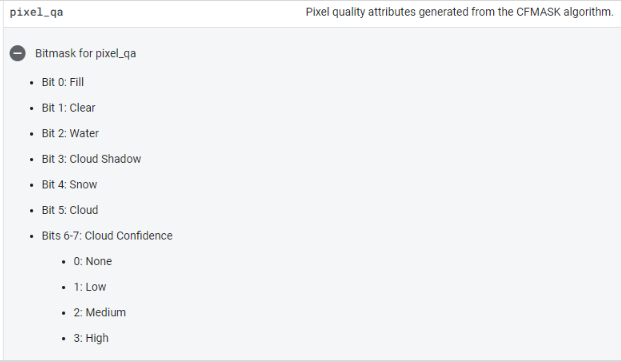

Tabela de qualidade de pixel para remoção de nuvem LANDSAT 8
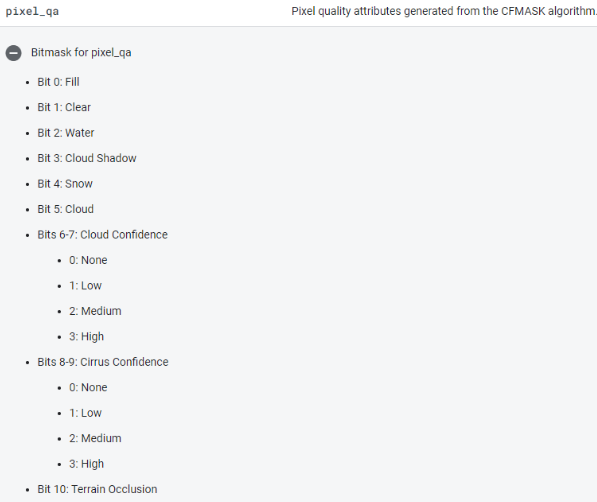


In [ ]:
# Função para máscara de nuvem para o Landsat 5 - SR
Map = geemap.Map()
  # //Se o bit da nuvem (5) estiver definido e a confiança da nuvem (7) for alta 
  # //ou o bit da sombra da nuvem estiver definido (3), então é um pixel ruim.
def maskL5(image):
  qa = image.select('pixel_qa')

  cloud = qa.bitwiseAnd(1 << 5) \
          .And(qa.bitwiseAnd(1 << 7)) \
          .Or(qa.bitwiseAnd(1 << 3))
  # // Remove pixels de borda que não ocorrem em todas as bandas
  mask2 = image.mask().reduce(ee.Reducer.min())
  return image.updateMask(cloud.Not()).updateMask(mask2)
# // Aplicar a função criada  
L5masked = L5.map(maskL5)
# //Parâmetros de Visualização colorida (cor verdadeira/Red-Green-Blue) Landsat 5
visParams2 = {'bands':['B3',  'B2',  'B1'], 'min': 150, 'max': 2000}
# //Visualizar uma imagem em composição colorida com e sem máscara de nuvem 

Map.addLayer(ee.Image(L5masked.first()), visParams2, 'Landsat 5 - Máscara de nuvem')
Map.addLayer(ee.Image(L5.first()), visParams2, 'Landsat 5 - Original')  
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [ ]:
# Função para máscara de nuvem para o Landsat 8 - SR
Map = geemap.Map()

def maskL8(image):
  # // Bits 3 e 5 são nuvens e sombra de nuvem, respectivamente.
  cloudShadowBitMask = 1 << 3
  cloudsBitMask = 1 << 5
  # // Selecionar a banda pixel QA
  qa = image.select('pixel_qa')
# // Ambos os valores devem ser zero, indicando condições sem nuvens

  mask = qa.bitwiseAnd(cloudShadowBitMask).eq(0) \
      .And(qa.bitwiseAnd(cloudsBitMask).eq(0))
  # // Retorna a imagem com a máscara
  return image.updateMask(mask).copyProperties(image, ["system:time_start"]) \
      #  // .select("B[0-9]*")
      
# // Aplicar a função criada
L8masked = L8.map(maskL8)
# //Parametros de visualização Landsat 8
visParams = ({'bands': ['B4', 'B3', 'B2'], 'min': 150, 'max': 2000})
# //Visualizar uma imagem Landsat 8 em composição colorida com e sem máscara de nuvem
Map.addLayer(ee.Image(L8masked.mean()), visParams, 'Landsat 8 - Máscara de nuvem')
Map.addLayer(ee.Image(L8.first()), visParams, 'Landsat 8 - Original')
Map.centerObject(AE)

Map


Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

### Prática no GEE - 02/09 - Cálculo de índice de vegetação 

In [ ]:
#  Landsat 5 - SR
Map = geemap.Map()

def NDVI(img):
  return img.addBands(img.normalizedDifference(['B4','B3']).rename('NDVI'))

# //Adicionar o NDVI para todo o conjunto de dados 
L5ndvi = L5masked.map(NDVI)

# //Para cada pixel seleciona o "melhor" dentro do conjunto de dados da área de estudo baseado no NDVI
composite = L5ndvi.qualityMosaic('NDVI').clip(AE)
print(composite, 'composite')
# // Parametros de visualização NDVI
ndviPalette = ['FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718','74A901', '66A000', '529400', '3E8601', '207401', '056201',
'004C00', '023B01', '012E01', '011D01', '011301']

# //Acessar o ee-palette para gerar paleta de cores automáticas no GEE
# //var palettes = require('users/gena/packages:palettes'); //https://github.com/gee-community/ee-palettes
# //Adicionar a paleta de cores escolhida na declaração da variável
# var paleta = palettes.niccoli.isol[7];

# //Visualizar a imagem de NDVI da área de estudo

Map.addLayer(composite.select('NDVI'), {'min': 0, 'max':1, 'palette': ndviPalette}, 'Landsat 5 - NDVI')

#Composição colorida
Map.addLayer(composite, {'bands': ['B3',  'B2',  'B1'], 'min':150, 'max':2000}, 'Landsat 5 - cor verdadeira')

#Composição falsa cor
Map.addLayer(composite, {'bands': ['B4',  'B5',  'B3'], 'min': 0, 'max': 2000}, 'Landsat 5 - falsa cor')

#Composição falsa cor
Map.addLayer(composite, {'bands': ['B6',  'B5',  'B1'], 'min': [1000,  1000,  200], 'max': [6000, 5500, 2000]}, 'Landsat 5 - falsa cor pasto')
Map


ee.Image({
  "functionInvocationValue": {
    "functionName": "Image.clip",
    "arguments": {
      "geometry": {
        "functionInvocationValue": {
          "functionName": "Collection.geometry",
          "arguments": {
            "collection": {
              "functionInvocationValue": {
                "functionName": "Collection.loadTable",
                "arguments": {
                  "tableId": {
                    "constantValue": "users/pca/ROI_Campina"
                  }
                }
              }
            }
          }
        }
      },
      "input": {
        "functionInvocationValue": {
          "functionName": "ImageCollection.qualityMosaic",
          "arguments": {
            "collection": {
              "functionInvocationValue": {
                "functionName": "Collection.map",
                "arguments": {
                  "baseAlgorithm": {
                    "functionDefinitionValue": {
                      "argumentNames": [
        

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [ ]:
#  Landsat 8 - SR
Map = geemap.Map()

def NDVI(img):
  return img.addBands(img.normalizedDifference(['B5','B4']).rename('NDVI'))

#Adicionar o NDVI para todo o conjunto de dados
L8ndvi = L8masked.map(NDVI)

#Para cada pixel seleciona o "melhor" dentro do conjunto de dados da área de estudo baseado no NDVI
composite = L8ndvi.qualityMosaic('NDVI').clip(AE)
print(composite, 'composite')

# Parametros de visualização NDVI
#ndviPalette = ['FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718',
#'74A901', '66A000', '529400', '3E8601', '207401', '056201',
#'004C00', '023B01', '012E01', '011D01', '011301']

#Acessar o ee-palette para gerar paleta de cores automáticas no GEE
# palettes = require('users/gena/packages:palettes'); #https:#github.com/gee-community/ee-palettes
# #Adicionar a paleta de cores escolhida na declaração da variável
# paleta = palettes.niccoli.isol[7]

#Visualizar a imagem de NDVI da área de estudo
Map.addLayer(composite.select('NDVI'), {'min': 0, 'max':1}, 'Landsat 8 - NDVI') #debug

#Composição colorida
Map.addLayer(composite, {'bands': ['B4',  'B3',  'B2'], 'min':0, 'max':2000}, 'Landsat 8 - cor verdadeira')

#Composição falsa cor
Map.addLayer(composite, {'bands': ['B5',  'B6',  'B4'], 'min': [1500,  1000,  100], 'max': [5500, 4500, 1500]}, 'Landsat 8 - falsa cor')

#Composição falsa cor
Map.addLayer(composite, {'bands': ['B10',  'B6',  'B2'], 'min': [2900,  1000,  100], 'max': [3000, 4500, 1500]}, 'Landsat 8 - falsa cor pasto')
Map


ee.Image({
  "functionInvocationValue": {
    "functionName": "Image.clip",
    "arguments": {
      "geometry": {
        "functionInvocationValue": {
          "functionName": "Collection.geometry",
          "arguments": {
            "collection": {
              "functionInvocationValue": {
                "functionName": "Collection.loadTable",
                "arguments": {
                  "tableId": {
                    "constantValue": "users/pca/ROI_Campina"
                  }
                }
              }
            }
          }
        }
      },
      "input": {
        "functionInvocationValue": {
          "functionName": "ImageCollection.qualityMosaic",
          "arguments": {
            "collection": {
              "functionInvocationValue": {
                "functionName": "Collection.map",
                "arguments": {
                  "baseAlgorithm": {
                    "functionDefinitionValue": {
                      "argumentNames": [
        

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [ ]:
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [ ]:
if Map.user_rois is not None:
    training_samples = Map.user_rois  ###testar com ponto ver se funciona, funciona
    print(training_samples.getInfo())

{'type': 'FeatureCollection', 'columns': {'classe': 'String', 'color': 'String', 'landcover': 'Integer', 'system:index': 'String'}, 'features': [{'type': 'Feature', 'geometry': {'geodesic': False, 'type': 'Polygon', 'coordinates': [[[-51.894583, -21.612856], [-51.894583, -21.611082], [-51.891779, -21.611082], [-51.891779, -21.612856], [-51.894583, -21.612856]]]}, 'id': '0', 'properties': {'classe': 'nativa', 'color': '#3388ff', 'landcover': 1}}, {'type': 'Feature', 'geometry': {'geodesic': False, 'type': 'Polygon', 'coordinates': [[[-51.882375, -21.614771], [-51.882375, -21.613068], [-51.878388, -21.613068], [-51.878388, -21.614771], [-51.882375, -21.614771]]]}, 'id': '1', 'properties': {'classe': 'nativa', 'color': '#3388ff', 'landcover': 1}}, {'type': 'Feature', 'geometry': {'geodesic': False, 'type': 'Polygon', 'coordinates': [[[-51.889852, -21.620835], [-51.889852, -21.619168], [-51.888173, -21.619168], [-51.888173, -21.620835], [-51.889852, -21.620835]]]}, 'id': '2', 'properties':

In [ ]:
geemap.show_youtube("https://youtu.be/VWh5PxXPZw0")

Output(layout=Layout(width='815px'))

In [ ]:
from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#pra ir pra pastinha do colab
geemap.ee_to_shp(Map.user_rois, "samples_campina3.shp")


Generating URL ...
Please wait ...
Data downloaded to /content/samples_campina3.shp


In [ ]:
#xportar como asset
geemap.ee_export_vector_to_asset(Map.user_rois, description='myExportTableTask', assetId='samples_campina3', maxVertices=None)

users/pca/samples_campina3
Exporting myExportTableTask... Please check the Task Manager from the JavaScript Code Editor.


In [ ]:
#carregar as amostras


###Prática no GEE - 23/09 - Classificação (teste classificadores)

In [ ]:
# //Gerar a máscara de área urbana

# // ---> criar o polígono ao redor da área urbana. Aqui renomear o polígono para "urbano" (criei uns polígonos de urbano fictícios), mudar as propriedades para FeatureCollection, criar uma 'property' com o nome "classe" e 'value' igual a 2 

# // Passar o polígono (FeatureCollection) para raster

Map = geemap.Map()
Map.addLayer(AE)
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [ ]:
#gerando os oligonos de urbano e renomeando
if Map.user_rois is not None:
    urbano = Map.user_rois
    print(urbano.getInfo())

{'type': 'FeatureCollection', 'columns': {'system:index': 'String'}, 'features': [{'type': 'Feature', 'geometry': {'geodesic': False, 'type': 'Polygon', 'coordinates': [[[-55.223405, -11.957166], [-55.223405, -11.927402], [-55.192405, -11.927402], [-55.192405, -11.957166], [-55.223405, -11.957166]]]}, 'id': '0', 'properties': {}}]}


In [ ]:
urbanoImg = urbano.filter(ee.Filter.notNull(['classe'])) \
  .reduceToImage(**{
    'properties': ['classe'],
    'reducer': ee.Reducer.first()
})

In [ ]:
# // Adicionar a layer do raster da máscara de urbano para verificar se está ok

Map.addLayer(urbanoImg,{}, 'Urbano Img')

In [ ]:
areaImg = ee.Image.constant(1).clip(AE) #//gerar uma imagem raster com pixels com valor 1 para todo o limite da área de estudo
urbanoMask = areaImg.blend(urbanoImg) #// unir os rasters do urbano e da área de estudo


In [ ]:
Map = geemap.Map()
# // Adicionar a layer para verificar se está ok
Map.addLayer(urbanoMask,{min:0, max:10}, 'Mascara urbano')
# // Mascarar a imagem Landsat com a máscara criada
composite = composite.updateMask(urbanoMask.eq(1)) #// valor igual a 1 representa a área diferente da área urbana que tem valor igual a 2

Map.addLayer(composite) #debug com detalhes

# //Verificar o resultado
# Map.addLayer(composite, {bands: ['B5', 'B6', 'B4'], min: [1500, 1000, 100], max: [5500, 4500, 1500]}, 'Landsat 8 - falsa cor com a máscara', false);//alterar valor máximo para 5000

# Map

In [ ]:
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

### Divisão treino e validação

In [ ]:
#carregando amostras criadas anteriormente
newfc = ee.FeatureCollection('users/pca/samples_campina3')

In [ ]:
# //Opção para gerar amostras de validação a partir das amostras de treinamento

# // Separar as amostras de treinamento criadas anteriormente em treino e validação (avaliação da classificação)
sample = newfc.randomColumn()
print("amostras",sample.getInfo())


amostras {'type': 'FeatureCollection', 'columns': {'classe': 'String', 'color': 'String', 'landcover': 'Integer', 'random': '<any>', 'system:index': 'String'}, 'features': [{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[-51.89458106659504, -21.61285700704112], [-51.89178073677116, -21.6128570448381], [-51.89178073677116, -21.61108233289491], [-51.89458106659504, -21.611082324203938], [-51.89458106659504, -21.61285700704112]]]}, 'id': '00000000000000000000', 'properties': {'classe': 'nativa', 'color': '#3388ff', 'landcover': 1, 'random': 0.6722173494267805}}, {'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[-51.882376518935, -21.61476997850365], [-51.87839008757064, -21.614770017704114], [-51.87839008757064, -21.613066590422733], [-51.882376518935, -21.613066639527165], [-51.882376518935, -21.61476997850365]]]}, 'id': '00000000000000000001', 'properties': {'classe': 'nativa', 'color': '#3388ff', 'landcover': 1, 'random': 0.0288706359324179}}, 

In [ ]:
split = 0.7 # // Definir 70% para treinamento, 30% para validação.
prev_training = sample.filter(ee.Filter.lt('random', split));
prev_validation = sample.filter(ee.Filter.gte('random', split));
print('treino', prev_training.getInfo());
print('validação', prev_validation.getInfo())

treino {'type': 'FeatureCollection', 'columns': {'classe': 'String', 'color': 'String', 'landcover': 'Integer', 'random': '<any>', 'system:index': 'String'}, 'features': [{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[-51.89458106659504, -21.61285700704112], [-51.89178073677116, -21.6128570448381], [-51.89178073677116, -21.61108233289491], [-51.89458106659504, -21.611082324203938], [-51.89458106659504, -21.61285700704112]]]}, 'id': '00000000000000000000', 'properties': {'classe': 'nativa', 'color': '#3388ff', 'landcover': 1, 'random': 0.6722173494267805}}, {'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[-51.882376518935, -21.61476997850365], [-51.87839008757064, -21.614770017704114], [-51.87839008757064, -21.613066590422733], [-51.882376518935, -21.613066639527165], [-51.882376518935, -21.61476997850365]]]}, 'id': '00000000000000000001', 'properties': {'classe': 'nativa', 'color': '#3388ff', 'landcover': 1, 'random': 0.0288706359324179}}, {'

In [ ]:
#pergunatr gleyce o que ela queria aqui
print(prev_training.getInfo())

{'type': 'FeatureCollection', 'columns': {'classe': 'String', 'color': 'String', 'landcover': 'Integer', 'random': '<any>', 'system:index': 'String'}, 'features': [{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[-51.89458106659504, -21.61285700704112], [-51.89178073677116, -21.6128570448381], [-51.89178073677116, -21.61108233289491], [-51.89458106659504, -21.611082324203938], [-51.89458106659504, -21.61285700704112]]]}, 'id': '00000000000000000000', 'properties': {'classe': 'nativa', 'color': '#3388ff', 'landcover': 1, 'random': 0.6722173494267805}}, {'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[-51.882376518935, -21.61476997850365], [-51.87839008757064, -21.614770017704114], [-51.87839008757064, -21.613066590422733], [-51.882376518935, -21.613066639527165], [-51.882376518935, -21.61476997850365]]]}, 'id': '00000000000000000001', 'properties': {'classe': 'nativa', 'color': '#3388ff', 'landcover': 1, 'random': 0.0288706359324179}}, {'type': 

In [ ]:
print(prev_validation.getInfo())

{'type': 'FeatureCollection', 'columns': {'classe': 'String', 'color': 'String', 'landcover': 'Integer', 'random': '<any>', 'system:index': 'String'}, 'features': [{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[-51.8976355319082, -21.61987566366375], [-51.895553146975516, -21.619875644542063], [-51.895553146975516, -21.616896954703893], [-51.89763553190821, -21.61689699114406], [-51.8976355319082, -21.61987566366375]]]}, 'id': '00000000000000000003', 'properties': {'classe': 'nativa', 'color': '#3388ff', 'landcover': 1, 'random': 0.7127715960341621}}, {'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[-51.87489861471445, -21.617003959746363], [-51.87186194757348, -21.617003993756065], [-51.87186194757348, -21.61562169347893], [-51.87489861471445, -21.615621695926414], [-51.87489861471445, -21.617003959746363]]]}, 'id': '00000000000000000004', 'properties': {'classe': 'nativa', 'color': '#3388ff', 'landcover': 1, 'random': 0.7039541677379653}}, 

In [ ]:
# // Seleção das bandas que serão utilizadas -------------------------------------------------------------------//

# //Para Landsat 5
# bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B7', 'NDVI'];

# //Para Landsat 8
bands = ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'NDVI'];


# //Classificação -------------------------------------------------------------------------//

# // Criar a variável de treinamento para a classificação com o Random Forest.

composite = composite.select(bands)
training = composite.sampleRegions(**{
    'collection':prev_training,
    'properties':['landcover'],
    'scale':30})

In [ ]:
igbpPalette = [
'#00750c', # Nativa
'#090be5', #// Agua
'#ff1706', #// Solo
]


In [ ]:
Map2= geemap.Map()
Map2.addLayer(composite)
Map2.addLayer(prev_training)
Map2.addLayer(prev_validation)
Map2

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

Prática no GEE - 23/09- Classificação (teste classificadores)

In [ ]:
# // Filter out the null property values and try again.
trainingNoNulls = training.filter(
  ee.Filter.notNull(training.first().propertyNames())
);
# FC.filter(ee.Filter.eq("system:index", '3'))

In [ ]:
# //Treinando o classificador Random Forest
classifier_RF = ee.Classifier.smileRandomForest(300).train(training, 'landcover')
  

In [ ]:
# # // Aplicação da classificação.
classified_RF = composite.classify(classifier_RF)  

In [ ]:
trainAccuracy = classifier.confusionMatrix()
print('Resubstitution error matrix: ', trainAccuracy)
print('Training overall accuracy: ', trainAccuracy.accuracy())

AttributeError: ignored

In [ ]:
igbpPalette = [
  'aec3d4', # nativa
  '152106', '225129', '369b47', '30eb5b', '387242', # forest
  '6a2325', 'c3aa69', 'b76031', 'd9903d', '91af40',  # pasto
  # '111149', # wetlands
  # 'cdb33b', # croplands
  # 'cc0013', # urban
  # '33280d', # crop mosaic
  # 'd7cdcc', # snow and ice
  # 'f7e084', # barren
  # '6f6f6f'  # tundra
]

# # //Visualizando a classificação Randon Forest
Map= geemap.Map()
Map.addLayer(classified_RF, {'palette': igbpPalette, 'min': 1, 'max': 3}, 'Random Forest3')
Map 

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

Prática no GEE - 07/10- Classificação (teste classificadores)

In [ ]:
# //Criando arquivo para validação
validation = composite.select(bands).sampleRegions(collection= prev_validation, properties =['landcover'],scale=30)
# //Obtendo a matriz de erro para os pontos de validação
validacao_RF = validation.classify(classifier_RF);


In [ ]:
confMatrix_RF = validacao_RF.errorMatrix('landcover','classification');
print('Validation error matrix: ', confMatrix_RF.getInfo())
print('Validation overall accuracy: ', confMatrix_RF.accuracy().getInfo())

Validation error matrix:  [[0, 0, 0, 0], [0, 358, 37, 0], [0, 4, 136, 24], [0, 0, 6, 231]]
Validation overall accuracy:  0.9108040201005025


In [ ]:
# // Imprimindo resultados para RF
print('Matriz de erro RF: ', confMatrix_RF.getInfo()) #//confusion matrix
print('Acurácia da classificação RF: ',confMatrix_RF.accuracy().getInfo()) #//overall accuracy
print('kappa RF: ',confMatrix_RF.kappa().getInfo()) #//kappa index

Matriz de erro RF:  [[0, 0, 0, 0], [0, 358, 37, 0], [0, 4, 136, 24], [0, 0, 6, 231]]
Acurácia da classificação RF:  0.9108040201005025
kappa RF:  0.8590043284643307


In [ ]:
print('Consumers Accuracy RF:', confMatrix_RF.consumersAccuracy().getInfo()) #; //Consumers Accuracy
print('Producers Accuracy RF:', confMatrix_RF.producersAccuracy().getInfo()) #; //Producers Accuracy

Consumers Accuracy RF: [[0, 0.988950276243094, 0.7597765363128491, 0.9058823529411765]]
Producers Accuracy RF: [[0], [0.9063291139240506], [0.8292682926829268], [0.9746835443037974]]


Sobre a acurácia do produtor e usuário:

As acurácias do usuário: São as estimativas das frações de píxels do mapeamento, para cada classe, corretamente classificados. A acurácia do usuário está associada ao erro de comissão (ou inclusão), que é o erro cometido ao atribuir um pixel à classe i, quando este pertence a alguma outra classe. Essas métricas estão associadas a confiabilidade da de cada classe mapeada.

Acurácias do produtor: São as frações amostrais de píxels de cada classe corretamente atribuídos às suas classes pelos classificadores. A acurácia do produtor está associada ao erro de omissão, que ocorre quando deixamos de mapear um pixel da classe j corretamente. Essas métricas estão associadas à sensibilidade do classificador, ou seja, a capacidade de distinguir corretamente determinada classe entre demais.

Trecho retirado de: https://mapbiomas.org/analise-de-acuracia


### Prática no GEE - 14/10 - Exportar mapa de classificação

In [ ]:
# // Reclassificar a melhor classificação antes da exportação através da função remap
# //por exemplo a classe 0 se torna 10, a 1 se torna 20, a 2 se torna 30 ...  
reclassified = classified_RF.remap([1,2,3],[10,20,30]) #;//para 4 classes
# //var reclassified = classified_RF.remap([0,1,2,3,4],[10,20,30,40,50]);// 5 classes
# //var reclassified = classified_RF.remap([0,1,2,3,4,5],[10,20,30,40,50,60]);// 6 classes


# // Exportar o mapa 

task = ee.batch.Export.image.toDrive(**{
'image': reclassified,
'region': AE,
'description': 'RF',
'scale': 30,
'crs': 'EPSG:4326',
'folder': 'Curso_GEE', #criar essa pasta antes
'maxPixels': 1000000000000
})
task.start()


In [ ]:
#ver status
task.status()
#mostrar o task manager tb

{'state': 'COMPLETED',
 'description': 'RF',
 'creation_timestamp_ms': 1661023473920,
 'update_timestamp_ms': 1661023498854,
 'start_timestamp_ms': 1661023480731,
 'task_type': 'EXPORT_IMAGE',
 'destination_uris': ['https://drive.google.com/#folders/1TTiR8w7tvQSdA7nmEH0p_SXN7ZySv62b'],
 'attempt': 1,
 'batch_eecu_usage_seconds': 23.778926849365234,
 'id': 'UE2ZNDSZF2KOGMSJOZW6CZFA',
 'name': 'projects/earthengine-legacy/operations/UE2ZNDSZF2KOGMSJOZW6CZFA'}

In [ ]:
###########acho que falta uma aula onde as classificaões 2004 e 2016 foram geradas

### Prática no GEE - 21/10 Análise de mudança 

###Prática no GEE - 28/10 Análise de mudança 

### Prática no GEE - 11/11- Utilizar dados meteorológicos a partir dos pontos de não mudança. 

In [ ]:
# //Importar geometria da área de estudo
area = ee.FeatureCollection(AE);

Map.centerObject(area);
 
# //Importar os pontos de nao mudanca "Unchanged_Points" em Asset
# //Assets>>Import into Script>>Definir renomeat "table" para "Unchanged"

# // Precipitação mensal (soma) ECMW
era5_tp = ee.ImageCollection('ECMWF/ERA5/MONTHLY').select('total_precipitation').filter(ee.Filter.date('2004-01-01', '2005-01-30')).filter(ee.Filter.bounds(area))
era5_tp_show=era5_tp.mosaic().clip(AE)
# composite = L5ndvi.qualityMosaic('NDVI').clip(AE)

In [ ]:

# // Visualization palette for total precipitation

visTp = {
  'min': 0,
  'max': 0.45,
  'palette': ['#972b8c','#52ff2d','#3a7b79','#8e36d6','#2966ff']

}

In [ ]:
Map = geemap.Map()
Map.addLayer(era5_tp_show,{},'CLIP') #era pra mostrar a img msm?

Map
#agr o grafico, quer ver os pontos durante o tempo?separados ou agregados?

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [ ]:
Map=geemap.Map()
# Map.addLayer(era5_tp.filter(ee.Filter.date('2004-09-15')), visTp,'Daily total precipitation sums')
# Map.addLayer(Unchanged,  {color: 'FF0000'},'Não Mudança', false);
# print('Não mudança',Unchanged)  ver onde essta isso
# Map